# Income Prediction based on Census information

The objective of this project is to design and build a machine learning pipeline that predicts the income of persons based on information received by the US Census Bureau. A practical application of this problem is for Urban Planning, and the implementation of Economic programs by the Government using insights received from this model.

We are also aiming to maximize the Accuracy of this Classification Project, as well as optimize for the `f1 score`

## Exploratory Data Analysis

Load the datasets after importing the necessary libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve, f1_score

import random

%matplotlib inline

In [2]:
train_df = pd.read_csv('../data/adult-train.csv')
train_df.head()

,age,workClass,financialWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,incomeTarget
0,44,Self-emp-inc,64632,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K
1,22,Private,211361,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,30,United-States,<=50K
2,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,<=50K
3,46,Private,330416,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
4,17,Private,226717,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
train_df.shape

(22792, 15)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              22792 non-null  int64 
 1   workClass        22792 non-null  object
 2   financialWeight  22792 non-null  int64 
 3   education        22792 non-null  object
 4   educationNum     22792 non-null  int64 
 5   maritalStatus    22792 non-null  object
 6   occupation       22792 non-null  object
 7   relationship     22792 non-null  object
 8   race             22792 non-null  object
 9   sex              22792 non-null  object
 10  capitalGain      22792 non-null  int64 
 11  capitalLoss      22792 non-null  int64 
 12  hoursPerWeek     22792 non-null  int64 
 13  nativeCountry    22792 non-null  object
 14  incomeTarget     22792 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [5]:
for col in train_df.columns:
    print('==================================', col, '==================================')
    print(train_df[col].unique())

================================== age ==================================
[44 22 21 46 17 23 20 47 58 38 35 61 27 42 30 39 36 29 53 18 24 37 40 41
 63 66 34 43 31 28 51 25 56 19 64 45 57 26 49 50 71 55 32 60 48 70 69 68
 54 62 33 52 59 73 67 84 65 75 90 80 72 81 74 76 79 82 85 77 78 83 88 86
 87]
================================== workClass ==================================
[' Self-emp-inc' ' Private' ' ?' ' Self-emp-not-inc' ' State-gov'
 ' Local-gov' ' Federal-gov' ' Without-pay' ' Never-worked']
================================== financialWeight ==================================
[ 64632 211361 204226 ... 514716 104457 268700]
================================== education ==================================
[' Doctorate' ' Bachelors' ' Some-college' ' 12th' ' 10th' ' HS-grad'
 ' 7th-8th' ' 9th' ' Masters' ' Assoc-acdm' ' Assoc-voc' ' 5th-6th'
 ' 1st-4th' ' Prof-school' ' 11th' ' Preschool']
================================== educationNum ==================================
[16 13 10  

In [6]:
val_df = pd.read_csv('../data/adult-val.csv')
val_df.head()

,age,workClass,financialWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,incomeTarget
0,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,United-States,<=50K
1,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,United-States,<=50K
2,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,United-States,>50K
3,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
4,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
train_df.head(10)

,age,workClass,financialWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,incomeTarget
0,44,Self-emp-inc,64632,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K
1,22,Private,211361,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,30,United-States,<=50K
2,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,<=50K
3,46,Private,330416,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
4,17,Private,226717,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K
5,23,Private,125525,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,42,United-States,<=50K
6,20,Private,386864,10th,6,Never-married,Other-service,Other-relative,White,Male,0,0,35,Mexico,<=50K
7,20,Private,114874,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,30,United-States,<=50K
8,47,Private,115358,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,Black,Female,0,0,40,United-States,<=50K
9,46,Private,181810,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,4064,0,40,United-States,<=50K


In [8]:
transformed_target = []
for _, value in train_df['incomeTarget'].iteritems():
    if value == ' <=50K':
        transformed_target.append(0)
    else:
        transformed_target.append(1)
train_df['incomeTarget'] = transformed_target

In [9]:
train_df.head(10)

,age,workClass,financialWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,incomeTarget
0,44,Self-emp-inc,64632,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,0
1,22,Private,211361,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,30,United-States,0
2,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,0
3,46,Private,330416,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
4,17,Private,226717,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,0
5,23,Private,125525,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,42,United-States,0
6,20,Private,386864,10th,6,Never-married,Other-service,Other-relative,White,Male,0,0,35,Mexico,0
7,20,Private,114874,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,30,United-States,0
8,47,Private,115358,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,Black,Female,0,0,40,United-States,0
9,46,Private,181810,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,4064,0,40,United-States,0


In [10]:
categorical = ['workClass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'nativeCountry']
numerical = ['financialWeight', 'educationNum', 'capitalGain', 'capitalLoss', 'hoursPerWeek']

train_df[categorical] = train_df[categorical].astype(str)

In [11]:
train_df.drop('nativeCountry', axis=1, inplace=True)

In [12]:
target = 'incomeTarget'

In [13]:
train_df.head(10)

,age,workClass,financialWeight,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,incomeTarget
0,44,Self-emp-inc,64632,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,0
1,22,Private,211361,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,30,0
2,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,0
3,46,Private,330416,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,0
4,17,Private,226717,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,0
5,23,Private,125525,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,42,0
6,20,Private,386864,10th,6,Never-married,Other-service,Other-relative,White,Male,0,0,35,0
7,20,Private,114874,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,30,0
8,47,Private,115358,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,Black,Female,0,0,40,0
9,46,Private,181810,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,4064,0,40,0


<AxesSubplot:xlabel='incomeTarget', ylabel='count'>

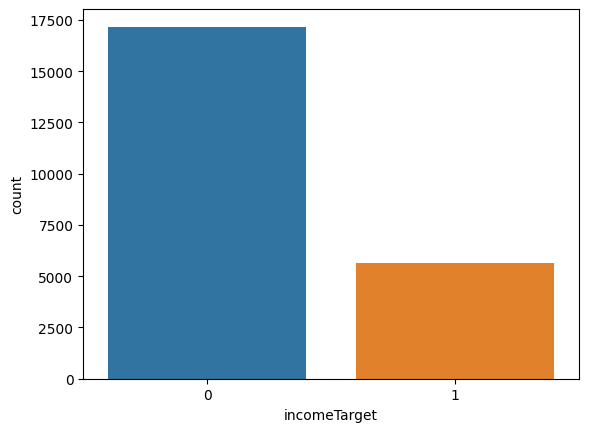

In [14]:
sns.countplot(x=train_df[target])

In [15]:
y_train = train_df[target]
X_train = train_df.drop('incomeTarget', axis=1, inplace=True)
X_train = pd.get_dummies(train_df)
X_train.head()

,age,financialWeight,educationNum,capitalGain,capitalLoss,hoursPerWeek,workClass_ ?,workClass_ Federal-gov,workClass_ Local-gov,workClass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,44,64632,16,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,22,211361,13,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,21,204226,10,0,0,35,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,46,330416,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,17,226717,8,0,0,20,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [16]:
# Upsampling
X_train_u, y_train_u = resample(X_train[y_train == 1],
                               y_train[y_train == 1],
                               replace=True,
                               n_samples=X_train[y_train == 0].shape[0],
                               random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))

# Upsample using SMOTE
sm = SMOTE(random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                               y_train[y_train == 0],
                               replace=True,
                               n_samples=X_train[y_train == 1].shape[0],
                               random_state=1)

X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

# Show datset sizes for each sampling technique and compare with original dataset
print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print("SMOTE sample shape:", X_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (22792, 66) (22792,)
Upsampled shape: (34340, 66) (34340,)
SMOTE sample shape: (34340, 66) (34340,)
Downsampled shape: (11244, 66) (11244,)


Text(0.5, 1.0, 'Downsampled Dataset')

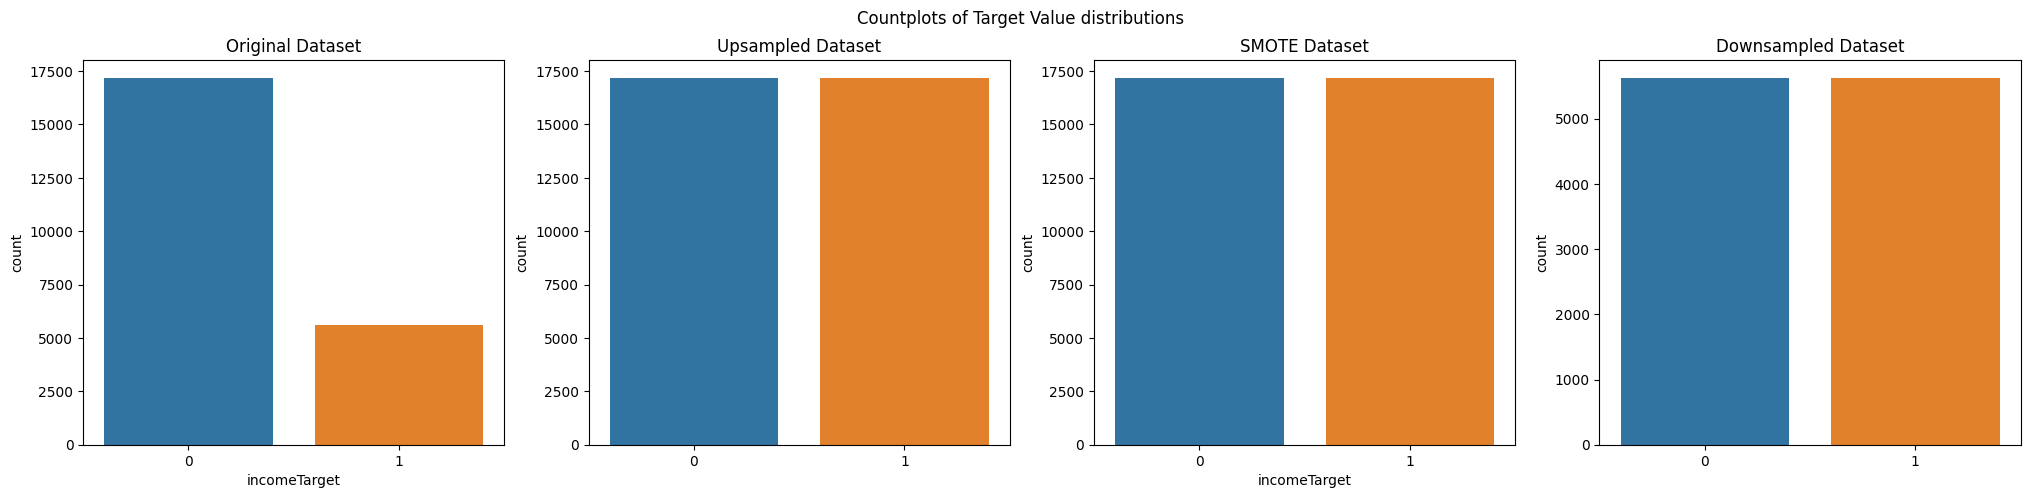

In [17]:
fig, axes = plt.subplots(1,4, figsize=(25,5))
fig.suptitle("Countplots of Target Value distributions")

sns.countplot(ax=axes[0], x = y_train)
axes[0].set_title("Original Dataset")

sns.countplot(ax=axes[1], x = y_train_u)
axes[1].set_title("Upsampled Dataset")

sns.countplot(ax=axes[2], x = y_train_sm)
axes[2].set_title("SMOTE Dataset")

sns.countplot(ax=axes[3], x = y_train_d)
axes[3].set_title("Downsampled Dataset")

In [18]:
# Create the Original, Upsampled, and Downsampled Training Sets
methods_data = {
    "Original": (X_train, y_train),
    "Upsampled": (X_train_u, y_train_u),
    "SMOTE": (X_train_sm, y_train_sm),
    "Downsampled": (X_train_d, y_train_d)
}

# Loop through each type of training sets and apply 5-Fold cross-validation using Logistic Regression
# By default, cross_val_score uses StratifiedCV
for method in methods_data.keys():
    log_reg_results = cross_val_score(LogisticRegression(max_iter=800, random_state=random.seed(12345)), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data is:", log_reg_results.mean())
    
cross_val_score(LogisticRegression(class_weight='balanced', max_iter=800), X_train, y_train, cv=5, scoring='f1').mean()

The best F1 Score for Original data is: 0.3909478566198816
The best F1 Score for Upsampled data is: 0.6143029602394205
The best F1 Score for SMOTE data is: 0.6654607386521468
The best F1 Score for Downsampled data is: 0.5786425434211813


0.4343942232644749

In [19]:
train_df_new = pd.DataFrame(X_train_sm, columns=X_train.columns)

In [20]:
train_df_new.head()

,age,financialWeight,educationNum,capitalGain,capitalLoss,hoursPerWeek,workClass_ ?,workClass_ Federal-gov,workClass_ Local-gov,workClass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,44,64632,16,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,22,211361,13,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,21,204226,10,0,0,35,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,46,330416,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,17,226717,8,0,0,20,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [21]:
train_dicts = train_df_new.to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

y_train = y_train_sm

logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_train)

In [22]:
f1_score(y_train, y_pred)

0.8150803876533528

In [23]:
print("\n\n ---LOGISTIC REGRESSION CLASSIFIER MODEL---")
auc = roc_auc_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)

print("Accuracy Score= %2.2f" % accuracy)
print("Area Under the ROC Curve = %2.2f" % auc)
print(confusion_matrix(y_train, y_pred,labels=[1,0]))
print(classification_report(y_train, y_pred, labels=[1,0]))



 ---LOGISTIC REGRESSION CLASSIFIER MODEL---
Accuracy Score= 0.81
Area Under the ROC Curve = 0.81
[[14550  2620]
 [ 3982 13188]]
              precision    recall  f1-score   support

           1       0.79      0.85      0.82     17170
           0       0.83      0.77      0.80     17170

    accuracy                           0.81     34340
   macro avg       0.81      0.81      0.81     34340
weighted avg       0.81      0.81      0.81     34340



In [24]:
def process_dataframe(filepath):    
    df = pd.read_csv(filepath)
    
    df.drop(['nativeCountry'], axis=1, inplace=True)
    
    target = 'incomeTarget'

    transformed_target = []

    for _, value in df['incomeTarget'].iteritems():
        if value == ' <=50K':
            transformed_target.append(0)
        else:
            transformed_target.append(1)
    df['incomeTarget'] = transformed_target
    
    y = df[target]
    X = df.drop('incomeTarget', axis=1, inplace=True)
    X = pd.get_dummies(df)

    # Upsample using SMOTE
    sm = SMOTE(random_state=12)
    X_train_sm, y_train_sm = sm.fit_resample(X, y)

    
    # df_new = pd.DataFrame(X_upsampled, columns=X.columns)
    df_new = pd.DataFrame(X_train_sm, columns=X.columns)
    
    return df_new, y_train_sm

In [25]:
X_train, y_train = process_dataframe('../data/adult-train.csv')
X_val, y_val = process_dataframe('../data/adult-val.csv')

len(X_train), len(y_train), len(X_val), len(y_val)

(34340, 34340, 15100, 15100)

In [26]:
X_train.head()

,age,financialWeight,educationNum,capitalGain,capitalLoss,hoursPerWeek,workClass_ ?,workClass_ Federal-gov,workClass_ Local-gov,workClass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,44,64632,16,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,22,211361,13,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,21,204226,10,0,0,35,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,46,330416,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,17,226717,8,0,0,20,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [27]:
X_train.columns

Index(['age', 'financialWeight', 'educationNum', 'capitalGain', 'capitalLoss',
       'hoursPerWeek', 'workClass_ ?', 'workClass_ Federal-gov',
       'workClass_ Local-gov', 'workClass_ Never-worked', 'workClass_ Private',
       'workClass_ Self-emp-inc', 'workClass_ Self-emp-not-inc',
       'workClass_ State-gov', 'workClass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalStatus_ Divorced',
       'maritalStatus_ Married-AF-spouse', 'maritalStatus_ Married-civ-spouse',
       'maritalStatus_ Married-spouse-absent', 'maritalStatus_ Never-married',
       'maritalStatus_ Separated', 'maritalStatus_ Widowed', 'occup

In [28]:
X_train.shape, X_val.shape

((34340, 66), (15100, 66))

In [29]:
dv = DictVectorizer()

train_dicts = X_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = X_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [30]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)

In [31]:
f1_score(y_val, y_pred)

0.8227327384342763

In [32]:
print("\n\n ---LOGISTIC REGRESSION CLASSIFIER MODEL---")
auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)

print("Accuracy Score= %2.2f" % accuracy)
print("Area Under the ROC Curve = %2.2f" % auc)
print(confusion_matrix(y_val, y_pred,labels=[1,0]))
print(classification_report(y_val, y_pred, labels=[1,0]))



 ---LOGISTIC REGRESSION CLASSIFIER MODEL---
Accuracy Score= 0.81
Area Under the ROC Curve = 0.81
[[6500 1050]
 [1751 5799]]
              precision    recall  f1-score   support

           1       0.79      0.86      0.82      7550
           0       0.85      0.77      0.81      7550

    accuracy                           0.81     15100
   macro avg       0.82      0.81      0.81     15100
weighted avg       0.82      0.81      0.81     15100

